<a href="https://colab.research.google.com/github/Nimeesh-Patel/NLPProjectAFakeNewDetection/blob/main/Collab%20Files/DL_NLP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members Details:





```
536,Abhinav Nair
539,Mannat Nayyar
543,Nimeesh Patel
545,Aditya Patil
```


### 1. **Data Loading**


In [ ]:
pip install pandas numpy tensorflow scikit-learn nltk seaborn matplotlib wordcloud joblib


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import joblib

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

                                               title  label
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1
1  Ever get the feeling your life circles the rou...      0
2  Why the Truth Might Get You Fired October 29, ...      1
3  Videos 15 Civilians Killed In Single US Airstr...      1
4  Print \nAn Iranian woman has been sentenced to...      1
Columns in dataset: Index(['title', 'label'], dtype='object')


<ipython-input-3-b56b7eaf7097>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="viridis")


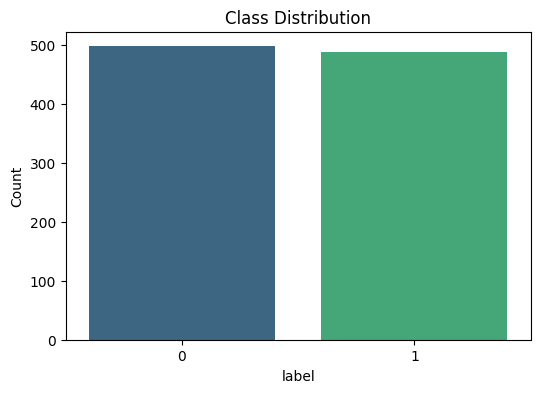

In [ ]:
file_path = "/content/NLP dataset.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
print(df.head())
print("Columns in dataset:", df.columns)

plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=df, palette="viridis")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()



### 2. **Text Processing**


In [ ]:
import nltk
nltk.download('punkt_tab')

import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(tokens)

# Load dataset
file_path = "/content/NLP dataset.xlsx"
df = pd.read_excel(file_path)

if "title" not in df.columns:
    print("Error: 'title' column not found in the dataset!")
else:
    # Apply preprocessing
    df["Processed_title"] = df["title"].astype(str).apply(preprocess_text)
    print(df[["title", "Processed_title"]].head())





[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               title  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  Ever get the feeling your life circles the rou...   
2  Why the Truth Might Get You Fired October 29, ...   
3  Videos 15 Civilians Killed In Single US Airstr...   
4  Print \nAn Iranian woman has been sentenced to...   

                                     Processed_title  
0  house dem aide even see comey letter jason cha...  
1  ever get feeling life circle roundabout rather...  
2  truth might get fired october tension intellig...  
3  video civilian killed single u airstrike ident...  
4  print iranian woman sentenced six year prison ...  


### 3. **Text Embedding**


In [ ]:
print(df.columns)  # Check all column names
print(df.head())   # Inspect the first few rows


Index(['title', 'label', 'Processed_title'], dtype='object')
                                               title  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                     Processed_title  
0  house dem aide even see comey letter jason cha...  
1  ever get feeling life circle roundabout rather...  
2  truth might get fired october tension intellig...  
3  video civilian killed single u airstrike ident...  
4  print iranian woman sentenced six year prison ...  


In [ ]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


In [ ]:
!pip install gensim

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
# Access the correct column name 'Processed_title'
X_train_bow = bow_vectorizer.fit_transform(train_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_val_bow = bow_vectorizer.transform(val_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_test_bow = bow_vectorizer.transform(test_data['Processed_title']).toarray() # Changed column name to 'Processed_title'

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Access the correct column name 'Processed_title'
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_val_tfidf = tfidf_vectorizer.transform(val_data['Processed_title']).toarray() # Changed column name to 'Processed_title'
X_test_tfidf = tfidf_vectorizer.transform(test_data['Processed_title']).toarray() # Changed column name to 'Processed_title'

# FastText (Word Embeddings)
# Access the correct column name 'Processed_title'
fasttext_model = gensim.models.FastText(train_data['Processed_title'].apply(str.split), vector_size=100, window=5, min_count=5) # Changed column name to 'Processed_title'
X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['Processed_title']] # Changed column name to 'Processed_title'
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['Processed_title']] # Changed column name to 'Processed_title'
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['Processed_title']] # Changed column name to 'Processed_title'


print("Embedding completed for BoW, TF-IDF, and FastText.")

Embedding completed for BoW, TF-IDF, and FastText.


### 4. **Model Training with Different Architectures**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten

# Define a CNN model
def cnn_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define an LSTM model
def lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN-BiLSTM model
def cnn_bilstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the models
input_dim = 5000
cnn = cnn_model(input_dim)
cnn.fit(X_train_bow, train_data['label'], validation_data=(X_val_bow, val_data['label']), epochs=5, batch_size=64)

lstm = lstm_model(input_dim)
lstm.fit(X_train_bow, train_data['label'], validation_data=(X_val_bow, val_data['label']), epochs=5, batch_size=64)

bilstm = cnn_bilstm_model(input_dim)
bilstm.fit(X_train_bow, train_data['label'], validation_data=(X_val_bow, val_data['label']), epochs=5, batch_size=64)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.5362 - loss: 1.4670 - val_accuracy: 0.7635 - val_loss: 0.6809
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.6497 - loss: 0.6660 - val_accuracy: 0.6081 - val_loss: 0.6391
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.6384 - loss: 0.5574 - val_accuracy: 0.6959 - val_loss: 0.5530
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8849 - loss: 0.3309 - val_accuracy: 0.8378 - val_loss: 0.3761
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.9206 - loss: 0.2277 - val_accuracy: 0.8649 - val_loss: 0.3351
Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 199s 17s/step - accuracy: 0.4913 - loss: 0.6957 - val_accuracy: 0.5405 - val_loss: 0.6915
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 194s 17s/step - accuracy: 0.5118 - loss: 0.6927 - val_accuracy: 0.4595 - val_loss: 0.6934
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 203s 17s/step - accuracy: 0.4951 - loss: 0.6935 - val_accuracy: 0.5405 - val_loss: 0

### 5. **Comparative Analysis of Models**


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the models
y_pred_cnn = cnn.predict(X_test_bow)
y_pred_lstm = lstm_model(input_dim).predict(X_test_bow)
y_pred_cnn_bilstm = cnn_bilstm_model(input_dim).predict(X_test_bow)

# Calculate accuracy and classification report
cnn_acc = accuracy_score(test_data['label'], y_pred_cnn.round())
print("CNN Accuracy:", cnn_acc)
print("CNN Classification Report:\n", classification_report(test_data['label'], y_pred_cnn.round()))

lstm_acc = accuracy_score(test_data['label'], y_pred_lstm.round())
print("LSTM Accuracy:", lstm_acc)
print("LSTM Classification Report:\n", classification_report(test_data['label'], y_pred_lstm.round()))

bilstm_acc = accuracy_score(test_data['label'], y_pred_cnn_bilstm.round())
print("CNN-BiLSTM Accuracy:", bilstm_acc)
print("CNN-BiLSTM Classification Report:\n", classification_report(test_data['label'], y_pred_cnn_bilstm.round()))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


4/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
CNN Accuracy: 0.9121621621621622
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93        91
           1       0.88      0.89      0.89        57

    accuracy                           0.91       148
   macro avg       0.91      0.91      0.91       148
weighted avg       0.91      0.91      0.91       148

LSTM Accuracy: 0.38513513513513514
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.39      1.00      0.56        57

    accuracy                           0.39       148
   macro avg       0.19      0.50      0.28       148
weighted avg       0.15      0.39      0.21       148

CNN-BiLSTM Accuracy: 0.6148648648648649
CNN-BiLSTM Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        91


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

### 6. **Saving the Best Model**

In [ ]:
cnn.save('best_text_classification_model.h5')
print("Best model saved as 'best_text_classification_model.h5'")

Best model saved as 'best_text_classification_model.h5'


### 7. **Prediction on Real-World Input**


In [ ]:
# Load the saved model
from keras.models import load_model
model = load_model('best_text_classification_model.h5')

# Real-world input
new_text = """Print
An Iranian woman has been sentenced to six years in prison after Iran’s Revolutionary Guard searched her home and found a notebook that contained a fictional story she’d written about a woman who was stoned to death, according to the Eurasia Review .
Golrokh Ebrahimi Iraee, 35, is the wife of political prisoner Arash Sadeghi, 36, who is serving a 19-year prison sentence for being a human rights activist, the publication reported.
“When the intelligence unit of the Revolutionary Guards came to arrest her husband, they raided their apartment – without a warrant – and found drafts of stories that Ebrahimi Iraee had written,” the article stated.
“One of the confiscated drafts was a story about stoning women to death for adultery – never published, never presented to anyone,” the article stated. “The narrative followed the story of a protagonist that watched a movie about stoning of women under Islamic law for adultery."""
processed_text = preprocess_text(new_text)
input_data = bow_vectorizer.transform([processed_text]).toarray()

# Predicting the class of new text
predicted_class = model.predict(input_data).round()
print(new_text)
if(predicted_class == 0):
  print(f"Predicted Class Label: Fake")
else:
  print(f"Predicted Class Label: Real")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Print 
An Iranian woman has been sentenced to six years in prison after Iran’s Revolutionary Guard searched her home and found a notebook that contained a fictional story she’d written about a woman who was stoned to death, according to the Eurasia Review . 
Golrokh Ebrahimi Iraee, 35, is the wife of political prisoner Arash Sadeghi, 36, who is serving a 19-year prison sentence for being a human rights activist, the publication reported. 
“When the intelligence unit of the Revolutionary Guards came to arrest her husband, they raided their apartment – without a warrant – and found drafts of stories that Ebrahimi Iraee had written,” the article stated. 
“One of the confiscated drafts was a story about stoning women to death for adultery – never published, never presented to anyone,” the article stated. “The narrative followed the story of a protagonist that watched a movie about stoning of women under Islamic law for adultery.
Predicted Class Label: